# McCulloch-Pitts Model of Neuron

The McCulloch-Pitts model of a neuron, introduced by Warren McCulloch and Walter Pitts in 1943, is one of the earliest and most influential models in the field of artificial neural networks. This model is a simplified representation of a biological neuron. It abstracts the complex biological processes into a mathematical model that can perform basic logical operations. The model consists of the following components:

1. **Inputs**: The neuron receives multiple binary inputs, which can be either 0 or 1.
2. **Weights**: Each input is associated with a weight, which is a real number. These weights determine the importance of each input.
3. **Summation**: The neuron calculates a weighted sum of its inputs.
4. **Activation Function**: The weighted sum is passed through an activation function, typically a step function, which determines the output of the neuron.
5. **Output**: The output is binary, either 0 or 1, depending on whether the weighted sum exceeds a certain threshold $\theta$.

### Mathematical Representation
The McCulloch-Pitts neuron can be mathematically represented as follows:

1. **Weighted Sum**:
   $$
   S = \sum_{i=1}^{n} w_i x_i
   $$
   where $x_i$ are the inputs, $w_i$ are the corresponding weights, and $n$ is the number of inputs.

2. **Activation Function**:
   $$
   y = \begin{cases} 
   1 & \text{if } S \geq \theta \\
   0 & \text{if } S < \theta 
   \end{cases}
   $$
   where $\theta$ is the threshold.


## DFA implementation with MPN
We want to implement a Deterministic Finite Automaton (DFA) that accepts an input string if the substring ‘100’ appears at least once within the input. To proceed with this implementation, we first need to convert the state transition table of the DFA into a binary network table suitable for a neural network implementation.

In [ ]:
# import necessary libraries
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

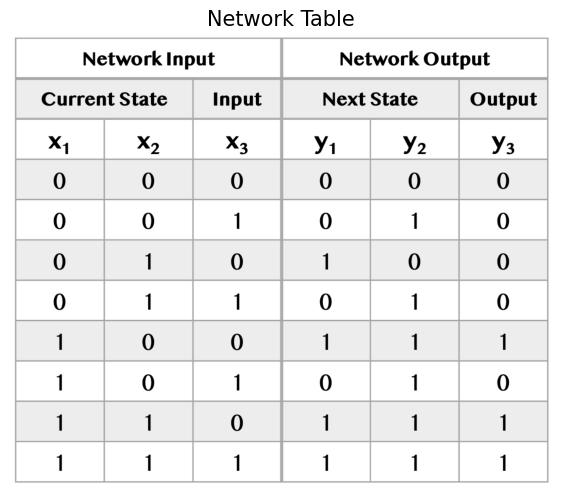

In [129]:
img = mpimg.imread('img/TABLE.png')
height, width, _ = img.shape
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis('off')
plt.title('Network Table', fontsize=15)
plt.show()


### Boolean Function
Next, we proceed by deriving the neural network for each of the outputs $y_1$, $y_2$, adn $y_3$. To minimize the number of neurons required in each network, we utilize Karnaugh maps (K-maps) for each of the three networks. By drawing the K-maps, we can determine the optimal boolean functions that represent the desired outputs with the fewest possible neurons. 

$$y_1=x_2\bar{x}_3+x_1x_2+x_1\bar{x}_3=\bar{x}_3(x_1+x_2)+x_1x_2$$
$$y_2=x_1+x_3$$
$$y_3=x_1\bar{x}_3+x_1x_2 = x_1(\bar{x}_3+x_2)$$

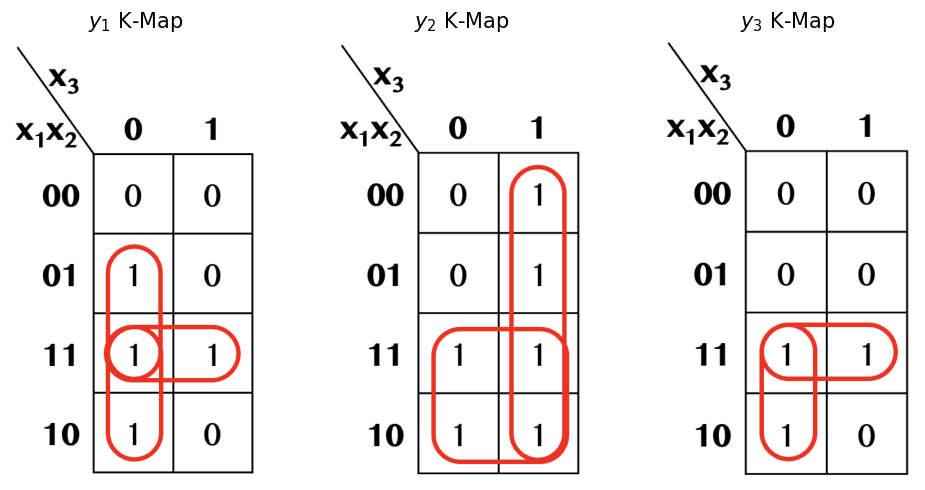

In [130]:
img1 = mpimg.imread('img/kmapY1.png')
img2 = mpimg.imread('img/kmapY2.png')
img3 = mpimg.imread('img/kmapY3.png')

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(img1)
axs[0].axis('off') 
axs[0].set_title('$y_1$ K-Map', fontsize=15)

axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title('$y_2$ K-Map', fontsize=15)

axs[2].imshow(img3)
axs[2].axis('off')
axs[2].set_title('$y_3$ K-Map', fontsize=15)

plt.tight_layout()
plt.show()

### Weights and Thresholds
To obtain the weights and minimum thresholds for each network, we first refer to the output of the boolean functions and determine the direction of the inequalities. Then, we simplify each inequality by assigning negative values to neurons that are negated in the boolean equations and positive values to other input symbols. Through trial and error, we start with an initial threshold $\theta$ and adjust to find the weights and minimum threshold value. 

#### $y_1$ Network:

Boolean function: $y_1=\bar{x}_3(x_1+x_2)+x_1x_2$
- $y_1(0,0,0) = 0 \rightarrow 0w_1+0w_2+0w_3 = 0 < \theta$
- $y_1(0,0,1) = 0 \rightarrow 0w_1+0w_2+1w_3 = 1w_3 < \theta$
- $y_1(0,1,0) = 1 \rightarrow 0w_1+1w_2+0w_3 = 1w_2 \geq \theta$
- $y_1(0,1,1) = 0 \rightarrow 0w_1+1w_2+1w_3 = 1w_2+1w_3 < \theta$
- $y_1(1,0,0) = 1 \rightarrow 1w_1+0w_2+0w_3 = 1w_1\geq \theta$
- $y_1(1,0,1) = 0 \rightarrow 1w_1+0w_2+1w_3 = 1w_1+1w_3< \theta$
- $y_1(1,1,0) = 1 \rightarrow 1w_1+1w_2+0w_3 = 1w_1+1w_2\geq \theta$
- $y_1(1,1,1) = 1 \rightarrow 1w_1+1w_2+1w_3 = 1w_1+1w_2+1w_3\geq \theta$

We set $w_1=1$, $w_2=1$, $w_3=-1$ and $\theta=1$ and check the inequalities:
- $y_1(0,0,0) = 0 \rightarrow 0 < 1 \quad\checkmark$
- $y_1(0,0,1) = 0 \rightarrow -1 < 1 \quad\checkmark$
- $y_1(0,1,0) = 1 \rightarrow 1 \geq 1 \quad\checkmark$
- $y_1(0,1,1) = 0 \rightarrow 0 < 1 \quad\checkmark$
- $y_1(1,0,0) = 1 \rightarrow 1 \geq 1 \quad\checkmark$
- $y_1(1,0,1) = 0 \rightarrow 0 < 1 \quad\checkmark$
- $y_1(1,1,0) = 1 \rightarrow 2 \geq 1 \quad\checkmark$
- $y_1(1,1,1) = 1 \rightarrow 1 \geq 1 \quad\checkmark$

#### $y_2$ Network:

Boolean function: $y_2=x_1+x_3$
- $y_2(0,0) = 0 \rightarrow 0w_1+0w_3 = 0 < \theta$
- $y_2(0,1) = 1 \rightarrow 0w_1+1w_3 = 1w_3 \geq \theta$
- $y_2(1,0) = 1 \rightarrow 1w_1+0w_3 = 1w_1 \geq \theta$
- $y_2(1,1) = 1 \rightarrow 1w_1+1w_3 = 1w_1+1w_3 \geq \theta$

We set $w_1=1$, $w_3=1$ and $\theta=1$ and check the inequalities:
- $y_2(0,0) = 0 \rightarrow 0 < 1 \quad\checkmark$
- $y_2(0,1) = 1 \rightarrow 1 \geq 1 \quad\checkmark$
- $y_2(1,0) = 1 \rightarrow 1 \geq 1 \quad\checkmark$
- $y_2(1,1) = 1 \rightarrow 2 \geq 1 \quad\checkmark$

#### $y_3$ Network:

Boolean function: $y_3=x_1(\bar{x}_3+x_2)$
- $y_3(0,0,0) = 0 \rightarrow 0w_1+0w_2+0w_3 = 0 < \theta$
- $y_3(0,0,1) = 0 \rightarrow 0w_1+0w_2+1w_3 = 1w_3 < \theta$
- $y_3(0,1,0) = 0 \rightarrow 0w_1+1w_2+0w_3 = 1w_2 < \theta$
- $y_3(0,1,1) = 0 \rightarrow 0w_1+1w_2+1w_3 = 1w_2+1w_3 < \theta$
- $y_3(1,0,0) = 1 \rightarrow 1w_1+0w_2+0w_3 = 1w_1\geq \theta$
- $y_3(1,0,1) = 0 \rightarrow 1w_1+0w_2+1w_3 = 1w_1+1w_3< \theta$
- $y_3(1,1,0) = 1 \rightarrow 1w_1+1w_2+0w_3 = 1w_1+1w_2\geq \theta$
- $y_3(1,1,1) = 1 \rightarrow 1w_1+1w_2+1w_3 = 1w_1+1w_2+1w_3\geq \theta$

We set $w_1=1$, $w_2=1$, $w_3=-1$ and $\theta=1$ and check the inequalities:
- $y_3(0,0,0) = 0 \rightarrow 0 < 1 \quad\checkmark$
- $y_3(0,0,1) = 0 \rightarrow -1 < 1 \quad\checkmark$
- $y_3(0,1,0) = 0 \rightarrow 1 < 1 \quad\times$

$w_2<\theta$ so we need to increase threshold. Lets try $w_1=1$, $w_2=1$, $w_3=-1$ and $\theta=2$:
- $y_3(0,0,0) = 0 \rightarrow 0 < 2 \quad\checkmark$
- $y_3(0,0,1) = 0 \rightarrow -1 < 2 \quad\checkmark$
- $y_3(0,1,0) = 0 \rightarrow 1 < 2 \quad\checkmark$
- $y_3(0,1,1) = 0 \rightarrow 0 < 2 \quad\checkmark$
- $y_3(1,0,0) = 1 \rightarrow 1 \geq 2 \quad\times$

$w_1\geq\theta$ so we need to increase $w_1$. Lets try $w_1=2$, $w_2=1$, $w_3=-1$ and $\theta=2$:
- $y_3(0,0,0) = 0 \rightarrow 0 < 2 \quad\checkmark$
- $y_3(0,0,1) = 0 \rightarrow -1 < 2 \quad\checkmark$
- $y_3(0,1,0) = 0 \rightarrow 1 < 2 \quad\checkmark$
- $y_3(0,1,1) = 0 \rightarrow 0 < 2 \quad\checkmark$
- $y_3(1,0,0) = 1 \rightarrow 2 \geq 2 \quad\checkmark$
- $y_3(1,0,1) = 0 \rightarrow 1 < 2 \quad\checkmark$
- $y_3(1,1,0) = 1 \rightarrow 3 \geq 2 \quad\checkmark$
- $y_3(1,1,1) = 1 \rightarrow 2 \geq 2 \quad\checkmark$

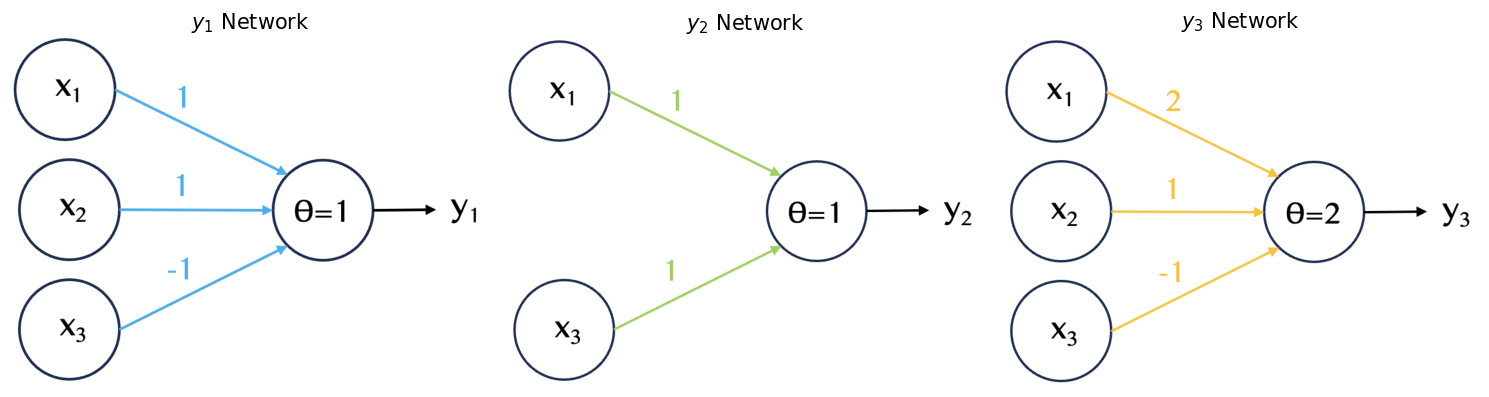

In [136]:
img1 = mpimg.imread('img/netY1.png')
img2 = mpimg.imread('img/netY2.png')
img3 = mpimg.imread('img/netY3.png')

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

axs[0].imshow(img1)
axs[0].axis('off') 
axs[0].set_title('$y_1$ Network', fontsize=15)

axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title('$y_2$ Network', fontsize=15)

axs[2].imshow(img3)
axs[2].axis('off')
axs[2].set_title('$y_3$ Network', fontsize=15)

plt.tight_layout()
plt.show()

To combine the 3 networks we can just use the highest threshold and adjust the weights.

### Result

$y_1$ Network:
- $w_1=2$
- $w_2=2$
- $w_3=-1$
- $\theta=2$

$y_2$ Network:
- $w_1=2$
- $w_2=0$
- $w_3=2$
- $\theta=2$

$y_3$ Network:
- $w_1=2$
- $w_2=1$
- $w_3=-1$
- $\theta=2$

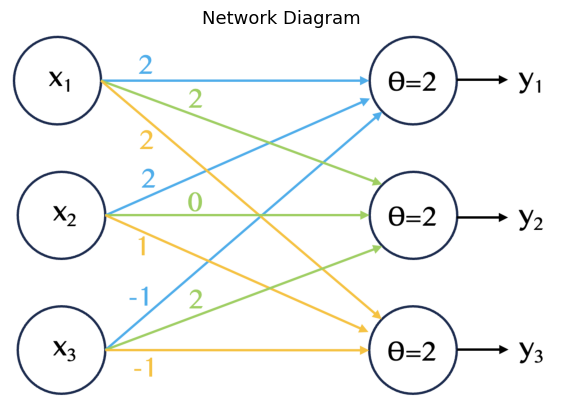

In [137]:
img = mpimg.imread('img/netall.png')
height, width, _ = img.shape
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis('off')
plt.title('Network Diagram', fontsize=13)
plt.show()


### Implementation

`class McCullochPittsNeuron`: This class models a neuron based on the McCulloch-Pitts model, which is a simple model of a neuron used in artificial neural networks and it has been previously explained.

`__init__(self, weights, threshold):`
- This is the constructor method that initializes an instance of the `McCullochPittsNeuron` class.
- `self.w`: The weights are a list or array of numbers that represent the strength of the connections to the neuron.
- `self.threshold`: The threshold $\theta$ is a number that determines the neuron's activation threshold.

`def activate(self, inputs):`
- This method takes an input vector `inputs` and determines whether the neuron should activate (fire) or not.
- The dot product of the weights and the inputs is calculated using the `@` operator. (The dot product is a sum of the products of corresponding elements of the two vectors.)
- If the dot product is greater than or equal to the threshold, the neuron activates and the method returns `1`, else the neuron does not activate and the method returns `0`.

In [133]:
class McCullochPittsNeuron:
    def __init__(self, weights, threshold):
        self.w = weights
        self.threshold = threshold

    def activate(self, inputs):
        if self.w @ inputs >= self.threshold:
            return 1
        else:
            return 0


**Neuron Initialization**: Three instances of the `McCullochPittsNeuron` class with specific weights and a threshold of 2 is created.

**Neuron Activation**: All three neurons are activated with the input array `[state[0], state[1], input]`. The result is stored in corresponding `y` variable.

**Return Statement**: A list containing the outputs of the three neurons, `y1`, `y2`, and `y3` is returned by the function.

In [134]:
#define model for dataset
def DFA(state , input):
  x1 = McCullochPittsNeuron([2, 2 , -1] , 2)
  x2 = McCullochPittsNeuron([2, 0 , 2] , 2)
  x3 = McCullochPittsNeuron([2, 1 , -1] , 2)

  y1 = x1.activate(np.array([state[0], state[1] , input]))
  y2 = x2.activate(np.array([state[0], state[1] , input]))
  y3 = x3.activate(np.array([state[0], state[1] , input]))

  # 3 bit output
  return list([y1, y2, y3])


**Defining States**:
- `state_b` is a list containing [1, 0].
- state is created using itertools.product(state_b, state_b), which generates all possible pairs (Cartesian product) of state_b with itself.

**Defining Inputs**:
- input is a list containing [1, 0].
- X is created using itertools.product(state, input), which generates all possible pairs of each state with each input.

Finally, the for loop iterates over each pair in X. `res = DFA(i[0], i[1])` calls the DFA function with the current state i[0] and input i[1], and stores the resulting output.

In [135]:
state_b = [1, 0]
state = list(itertools.product(state_b, state_b))
print('state: ', state)

input = [1, 0]
X = list(itertools.product(state, input))
print('X: ', X)

resultTable = pd.DataFrame(columns=['Current State', 'Input', 'Next State', 'Output'])
for i in X:
    res = DFA(i[0],i[1])
    resultTable = resultTable._append({
        'Current State': f'{i[0][0]}{i[0][1]}', 
        'Input': f'{i[1]}', 
        'Next State': f'{res[0]}{res[1]}',
        'Output': f'{res[2]}'},
        ignore_index=True)
resultTable

state:  [(1, 1), (1, 0), (0, 1), (0, 0)]
X:  [((1, 1), 1), ((1, 1), 0), ((1, 0), 1), ((1, 0), 0), ((0, 1), 1), ((0, 1), 0), ((0, 0), 1), ((0, 0), 0)]


,Current State,Input,Next State,Output
0,11,1,11,1
1,11,0,11,1
2,10,1,01,0
3,10,0,11,1
4,01,1,01,0
5,01,0,10,0
6,00,1,01,0
7,00,0,00,0
